In [29]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from pathlib import Path

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
file_path_01 = "/content/drive/My Drive/Colab Notebooks/22_23 - Project 3/Inland_Fisheries-Length_Weight.csv"
# https://data.cnra.ca.gov/dataset/inland-fisheries-length-weight-ds195
# https://data-cdfw.opendata.arcgis.com/datasets/CDFW::inland-fisheries-length-weight-ds195/explore

file_path_used = file_path_01

df = pd.read_csv(file_path_used)

In [32]:
df.columns

Index(['X', 'Y', 'PHOTO', 'SNAME', 'CNAME', 'FAMILY', 'LWDATE', 'LENGTH',
       'WEIGHT', 'TEMP_', 'PH', 'HARDNESS', 'CONDUCTIV', 'FLOW', 'SITEID',
       'SITE', 'ELEVATION', 'COUNTY', 'MAPQUAD', 'UTMZONE', 'UTMEAST27',
       'UTMNORTH27', 'OBJECTID'],
      dtype='object')

In [46]:
df_used = df.copy()


df_used = df_used.drop(columns="X")
df_used = df_used.drop(columns="Y")
df_used = df_used.drop(columns="PHOTO")
df_used = df_used.drop(columns="SNAME")
# df_used = df_used.drop(columns="CNAME")
df_used = df_used.drop(columns="FAMILY")
df_used = df_used.drop(columns="LWDATE")
# df_used = df_used.drop(columns="LENGTH")
# df_used = df_used.drop(columns="WEIGHT")
df_used = df_used.drop(columns="TEMP_")
df_used = df_used.drop(columns="PH")
df_used = df_used.drop(columns="HARDNESS")
df_used = df_used.drop(columns="CONDUCTIV")
df_used = df_used.drop(columns="FLOW")
df_used = df_used.drop(columns="SITEID")
df_used = df_used.drop(columns="SITE")
df_used = df_used.drop(columns="ELEVATION")
df_used = df_used.drop(columns="COUNTY")
df_used = df_used.drop(columns="MAPQUAD")
df_used = df_used.drop(columns="UTMZONE")
df_used = df_used.drop(columns="UTMEAST27")
df_used = df_used.drop(columns="UTMNORTH27")
df_used = df_used.drop(columns="OBJECTID")


df_used.head()

,CNAME,LENGTH,WEIGHT
0,Rainbow Trout,302,210.0
1,Rainbow Trout,215,100.0
2,Rainbow Trout,276,190.0
3,Rainbow Trout,268,170.0
4,Rainbow Trout,256,160.0


In [47]:
df_used["CNAME"].value_counts()

,count
CNAME,
Rainbow Trout,10888
Brown Trout,3633
California Roach,1661
Sacramento Sucker,853
Brook Trout,801
Cutthroat Trout,432
Riffle Sculpin,300
Largemouth Bass,240
Green Sunfish,175


In [48]:
### Initial run complete - Model failed.
### Remove all but the most numerous fish (rainbow trout) and trying again with only this data set.
### Proof of concept
df_used = df_used.loc[df['CNAME'] == 'Rainbow Trout']

### Now that it is filtered, I no longe rneed the column
df_used = df_used.drop(columns="CNAME")


In [49]:
df_used.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10888 entries, 0 to 19348
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LENGTH  10888 non-null  int64  
 1   WEIGHT  10888 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 255.2 KB


In [50]:
### M19D03A03
### With CNAME filtered to Rainbow Trout, this is no longer needed.
### Kept for reference
# from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# cname_encoder = OneHotEncoder(sparse_output=False)
# cname_encoded = cname_encoder.fit_transform(df_used[['CNAME']])
# cname_columns = cname_encoder.get_feature_names_out(['CNAME'])
# cname_encoded_df = pd.DataFrame(cname_encoded, columns=cname_columns)

# # Combine the processed y data into a new DataFrame
# df_encoded = pd.concat([
#     df_used,
#     cname_encoded_df
#     ],
#     axis=1
#     )
# df_encoded = df_encoded.drop(columns="CNAME")
# df_encoded
df_used

,LENGTH,WEIGHT
0,302,210.0
1,215,100.0
2,276,190.0
3,268,170.0
4,256,160.0
...,...,...
19188,172,62.0
19189,232,142.0
19190,217,95.0
19191,75,4.0


In [65]:
# y = df_encoded["WEIGHT"]
# X = df_encoded.copy()
# X = X.drop(columns="WEIGHT")

y = df_used["WEIGHT"]
X = df_used.copy()
X = X.drop(columns="WEIGHT")

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23)

data = [X_train, X_test, y_train, y_test]

# scaler = StandardScaler().fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)
#
# data = [X_train_scaled, X_test_scaled, y_train, y_test]


In [66]:
# input_nodes = len(X.columns)
input_nodes = 1

nn_model = tf.keras.models.Sequential()

nn_model.add(tf.keras.layers.Dense(units=15, activation="relu", input_dim=input_nodes)) #  ----- First Layer
nn_model.add(tf.keras.layers.Dense(units=15, activation="relu", input_dim=input_nodes)) #  ----- Secondy Layer
nn_model.add(tf.keras.layers.Dense(units=15, activation="relu", input_dim=input_nodes)) #  ----- Third Layer
nn_model.add(tf.keras.layers.Dense(units=15, activation="relu", input_dim=input_nodes)) #  ----- fourth Layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid", input_dim=input_nodes)) # --- Output

nn_model.summary()

nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_35 (Dense)                     │ (None, 15)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 15)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 15)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 15)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 766 (2.99 KB)

 Trainable params: 766 (2.99 KB)

 Non-trainable params: 0 (0.00 B)

In [67]:
fit_nn_model = nn_model.fit(X_train, y_train, epochs=50)
# fit_nn_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

model_loss, model_accuracy = nn_model.evaluate(X_test, y_test, verbose=2)
# model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0239 - loss: -9967.5693
Epoch 2/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0255 - loss: -1221679.1250
Epoch 3/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0232 - loss: -21168462.0000
Epoch 4/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0253 - loss: -127231072.0000
Epoch 5/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0243 - loss: -455247040.0000
Epoch 6/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0289 - loss: -1182790528.0000
Epoch 7/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0234 - loss: -2533029376.0000
Epoch 8/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0275 - loss: -5058553856.0000
Epoch 9/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0272 - loss: -9057030144.0000
Epoch 10/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0267 - loss: -14048367616.0000
Epoch 11/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/ste

<Axes: >

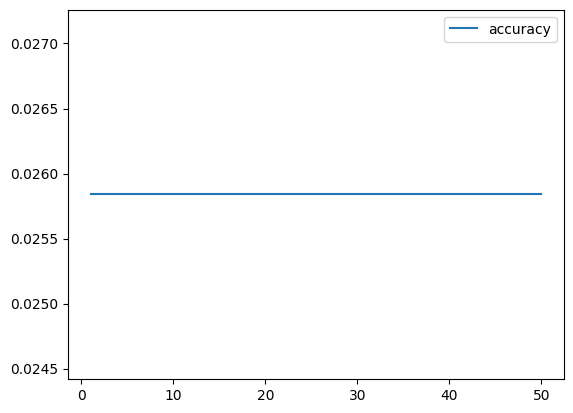

In [68]:
# M18D01A02
history_df = pd.DataFrame(fit_nn_model.history)
history_df.index += 1
history_df.plot(y="accuracy")